In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#Loading the file from our work_station
file_path = "C:/Users/Lenovo/Downloads/archive/US_Accidents_March23.csv"
data = pd.read_csv(file_path)

In [32]:
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [33]:
data.describe(include = object)

,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,7728394,7728394,7728394,7728394,7728389,7717525,7728141,7728394,7728394,7726479,7728394,7720586,7705759,7608166,7553188,7554935,7705148,7705148,7705148,7705148
unique,7728394,3,6131796,6705355,3761578,336306,13678,1871,49,825094,1,4,2045,941331,24,144,2,2,2,2
top,A-1,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,4325632,225,112,9593,78430,186917,526851,1741433,11247,7728394,3580167,118332,1311,961624,2560802,5334553,5695619,6076156,6377548


In [22]:
print(data.isna().sum())

A-10001                                                           0
Source2                                                           0
2                                                                 0
2017-01-06 16:18:18                                               0
2017-01-06 16:48:11                                               0
37.722954                                                         0
-121.100594                                                       0
Unnamed: 7                                                     9999
Unnamed: 8                                                     9999
0.01                                                              0
Accident on CA-99 Northbound at Exit 234 Hammett Road Opas.       0
CA-99 N                                                           0
Salida                                                            0
Stanislaus                                                        0
CA                                              

In [34]:
data.drop(columns=['End_Lat', 
                   'Wind_Chill(F)', 
                   'End_Lng',
                   'Precipitation(in)'], 
          axis=1, 
          inplace=True)

In [58]:
# Separating categorical columns and storing them in a separate variable
categorical = [i for i in data.columns if data[i].dtype == 'O']

# For any null values in categorical columns, utilize the mode function
for i in categorical:
    data[i] = data[i].fillna(data[i].mode()[0])

print("Done")

Done


In [37]:
#Checking for null values
data.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)           163853
Humidity(%)              174144
Pressure(in)             140679
Visibility(mi)           177098
Wind_Direction                0
Wind_Speed(mph)          571233
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [38]:
#Searching for duplicates
print("Duplicates: ",data.duplicated().sum())

Duplicates:  0


In [39]:
city_accidents = data['City'].value_counts().sort_values(ascending = False).reset_index()
print(city_accidents)

                               City   count
0                             Miami  187170
1                           Houston  169609
2                       Los Angeles  156491
3                         Charlotte  138652
4                            Dallas  130939
...                             ...     ...
13673                    Bon Secour       1
13674                 Sidney Center       1
13675                        Fluker       1
13676                    Mapleville       1
13677  American Fork-Pleasant Grove       1

[13678 rows x 2 columns]


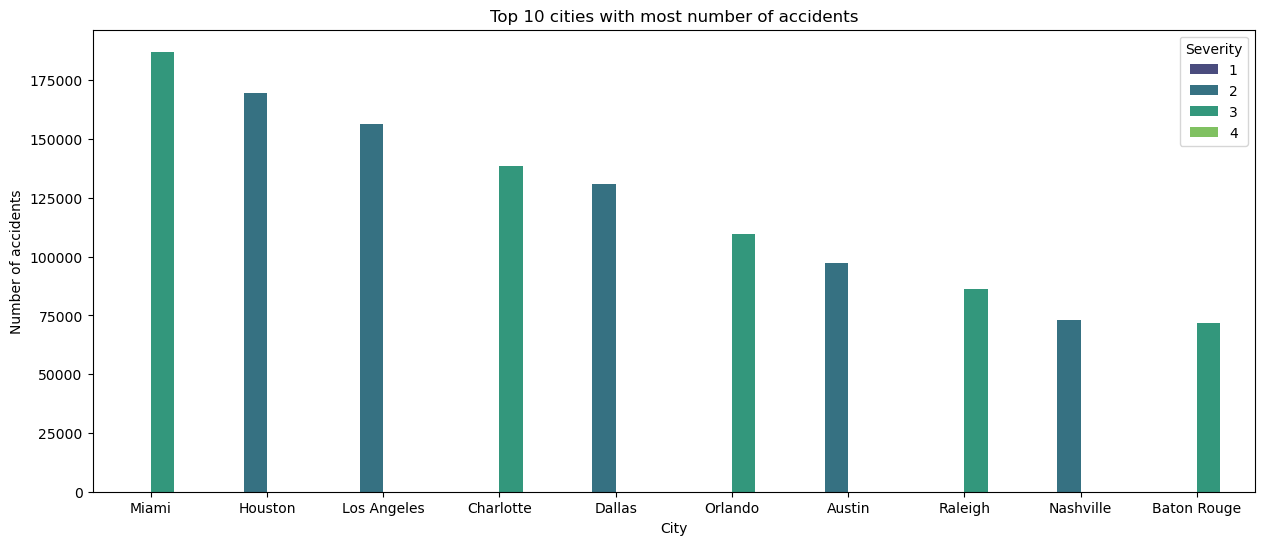

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x='City', y='count', 
            data= city_accidents.head(10),
            palette='viridis', 
            hue = data['Severity'])
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("Number of accidents")
plt.show()

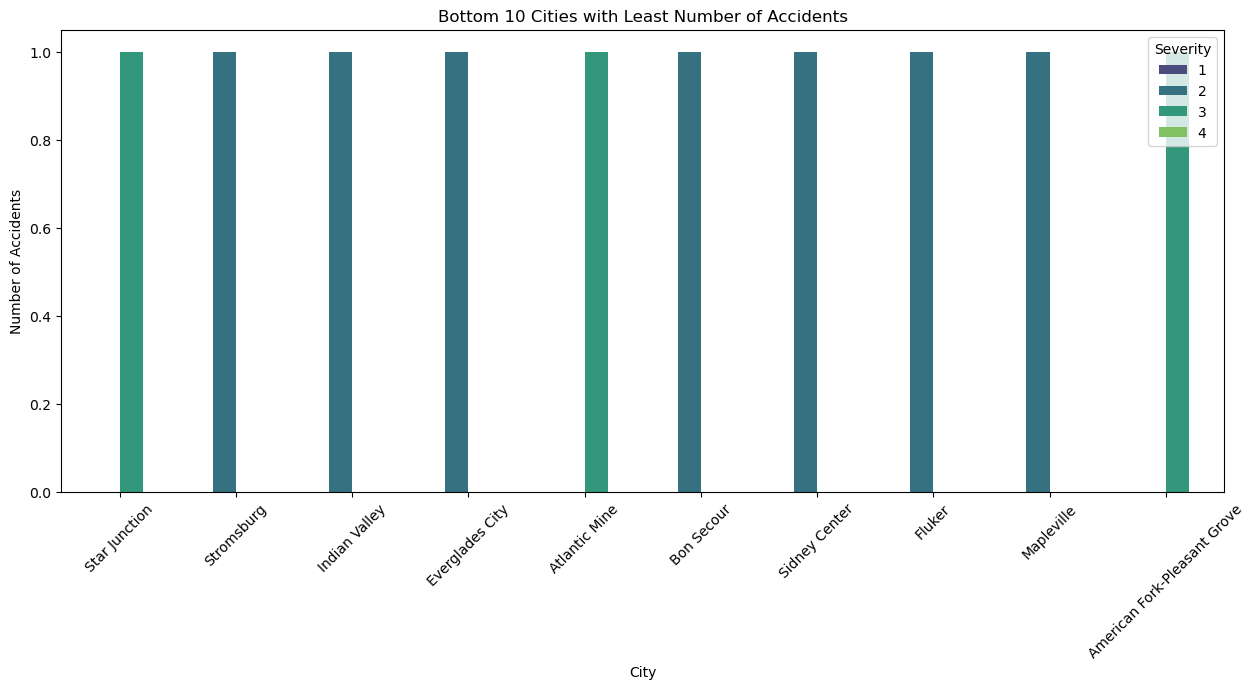

In [41]:
plt.figure(figsize=(15, 6))
sns.barplot(x='City', y='count', data=city_accidents.tail(10), 
            hue = data['Severity'], 
            palette='viridis')

plt.title("Bottom 10 Cities with Least Number of Accidents")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right')
plt.show()

In [42]:
state_accidents = data['State'].value_counts().sort_values(ascending = False).reset_index()
state_accidents

,State,count
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


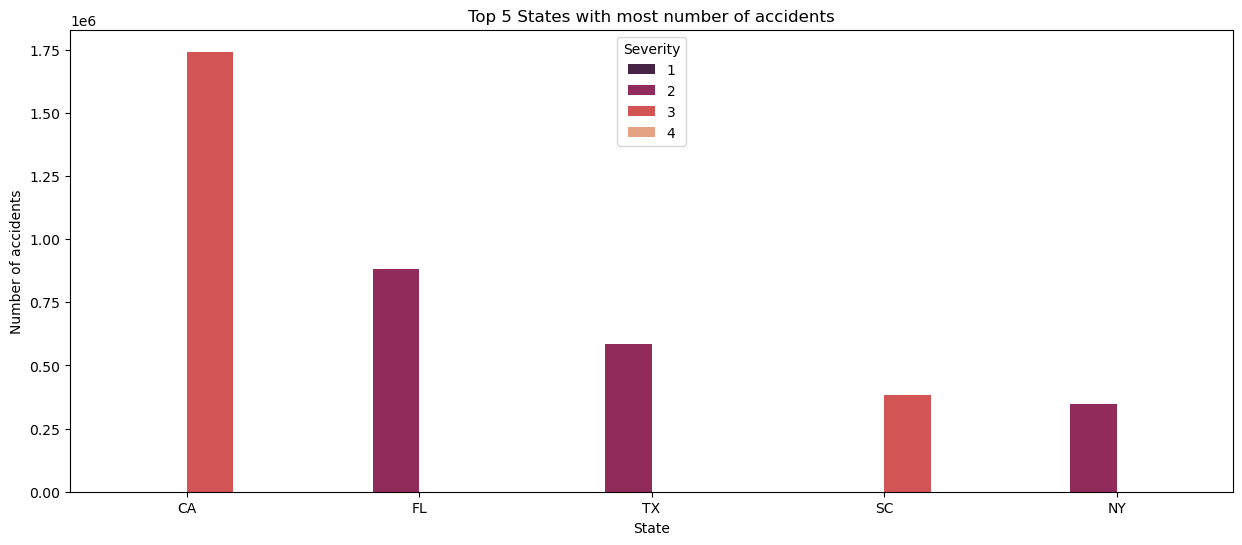

In [43]:
#Bar plotting States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State', y='count', 
            data= state_accidents.head(5), 
            hue = data['Severity'],
            palette='rocket')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("Number of accidents")
plt.show()

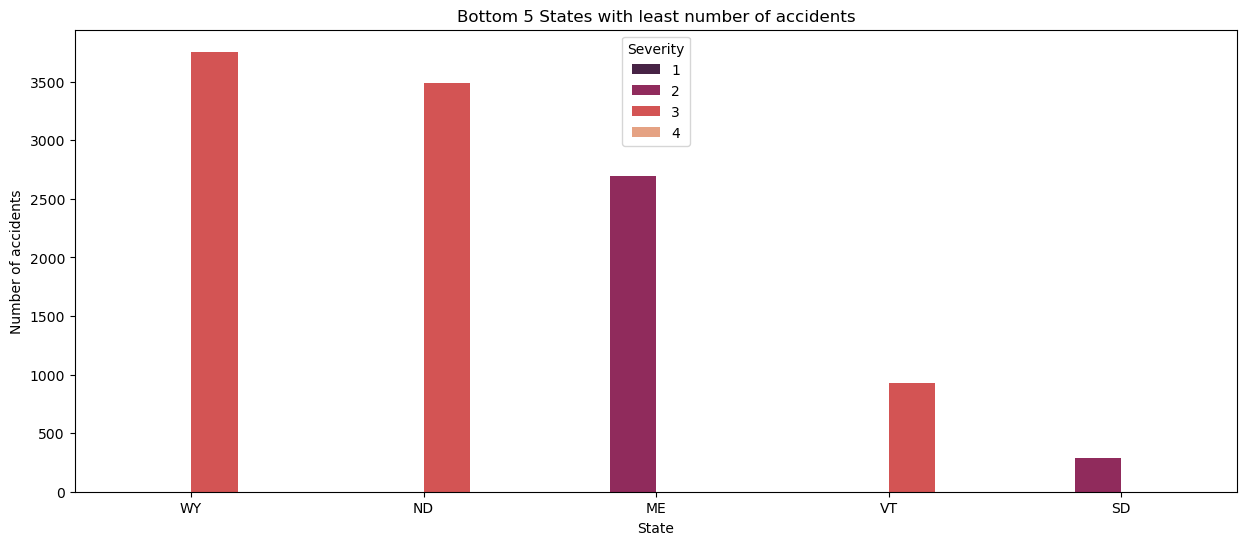

In [44]:
#Bar plotting States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',
            data= state_accidents.tail(5), 
            hue = data['Severity'],
            palette='rocket')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("Number of accidents")
plt.show()

In [45]:
data['Severity'].value_counts().index

Index([2, 3, 4, 1], dtype='int64', name='Severity')

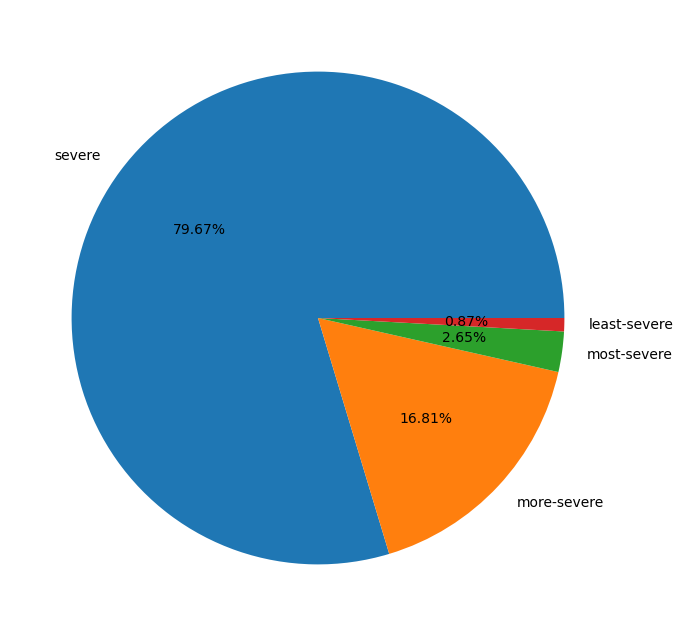

In [46]:
#Pie plotting the Severity
plt.figure(figsize=(8,8))
plt.pie(data['Severity'].value_counts(),
        labels=['severe', 'more-severe', 'most-severe', 'least-severe'],
        autopct="%1.2f%%")
plt.show()

In [57]:
# Convert the 'Start_Time' column into datetime format
data['Start_Time'] = pd.to_datetime(data['Start_Time'], 
                                    errors='coerce')
# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
data['Year'] = data['Start_Time'].dt.year
print("Done")

Done


In [49]:
# Display the first few rows to verify
print(data[['Start_Time', 'Year']].head(3))

           Start_Time    Year
0 2016-02-08 05:46:00  2016.0
1 2016-02-08 06:07:59  2016.0
2 2016-02-08 06:49:27  2016.0


In [50]:
data['Year'].value_counts()

Year
2021.0    1412433
2022.0    1268806
2020.0    1161598
2019.0     954302
2018.0     893426
2017.0     717290
2016.0     410821
2023.0     166552
Name: count, dtype: int64

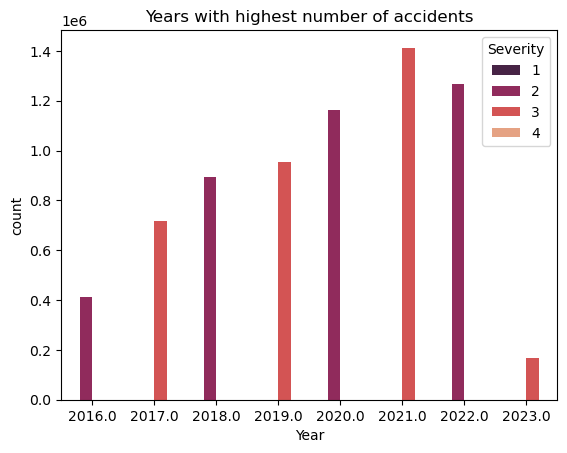

In [51]:
year_wise_count = data['Year'].value_counts().reset_index()
sns.barplot(x='Year', y='count', 
            data = year_wise_count, 
            hue = data['Severity'],
            palette='rocket')
plt.title("Years with highest number of accidents")
plt.show()

In [54]:
# Convert 'Start_Time' to datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
print("Done")

Done


In [55]:
# Creating a new column 'Time' from the 'Start_Time' column
data['Time'] = data['Start_Time'].dt.time
print("Done")

Done


In [56]:
def categorize_time_vectorized(time_series):
    conditions = [
        (time_series >= pd.to_datetime('05:00:00').time()) & (time_series < pd.to_datetime('12:00:00').time()),
        (time_series >= pd.to_datetime('12:00:00').time()) & (time_series < pd.to_datetime('17:00:00').time()),
        (time_series >= pd.to_datetime('17:00:00').time()) & (time_series < pd.to_datetime('21:00:00').time())
    ]
    choices = ['MORNING', 'AFTERNOON', 'EVENING']
    time_series = np.where(pd.isna(time_series), 'UNKNOWN', time_series)
    return np.select(conditions, choices, default='NIGHT')

data['time_category'] = categorize_time_vectorized(data['Time'])
print("Done")

Done


In [59]:
# Create a subset of the data(setting the limit to 99,999 instead of full 7.7 M)
data_subset = data.head(99999).copy() 

# Applying the categorize_time_vectorized function to this subset
data_subset.loc[:, 'Time_Zone'] = categorize_time_vectorized(data_subset['Time'])

# Verify
print(data_subset[['Time', 'Time_Zone']].head())

print("Done")

       Time Time_Zone
0  05:46:00   MORNING
1  06:07:59   MORNING
2  06:49:27   MORNING
3  07:23:34   MORNING
4  07:39:07   MORNING
Done


In [60]:
# Counting the number of accidents in each timezone
time_zone_counts = data_subset['Time_Zone'].value_counts()
print("TIME ZONES:\n " ,time_zone_counts)

TIME ZONES:
  Time_Zone
MORNING      28718
AFTERNOON    26563
EVENING      25305
NIGHT        19413
Name: count, dtype: int64


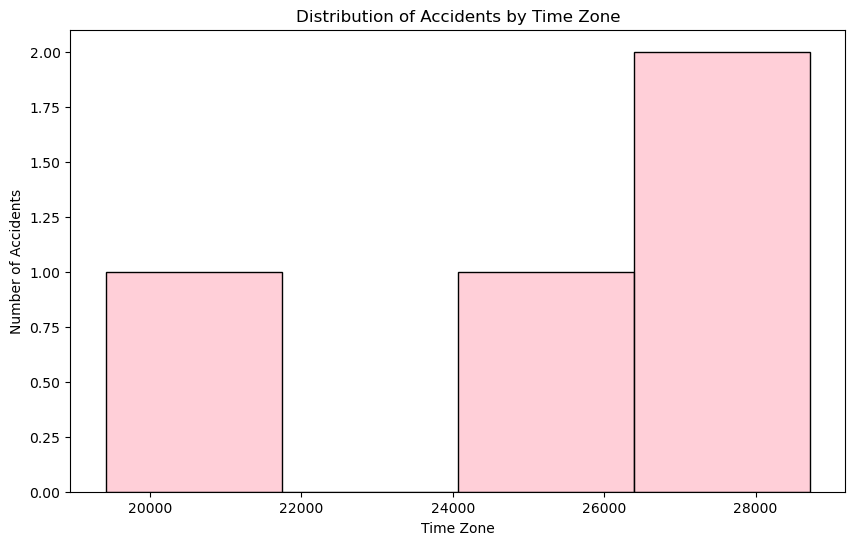

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(time_zone_counts, 
             bins=4, 
             kde=False, 
             color='pink')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()

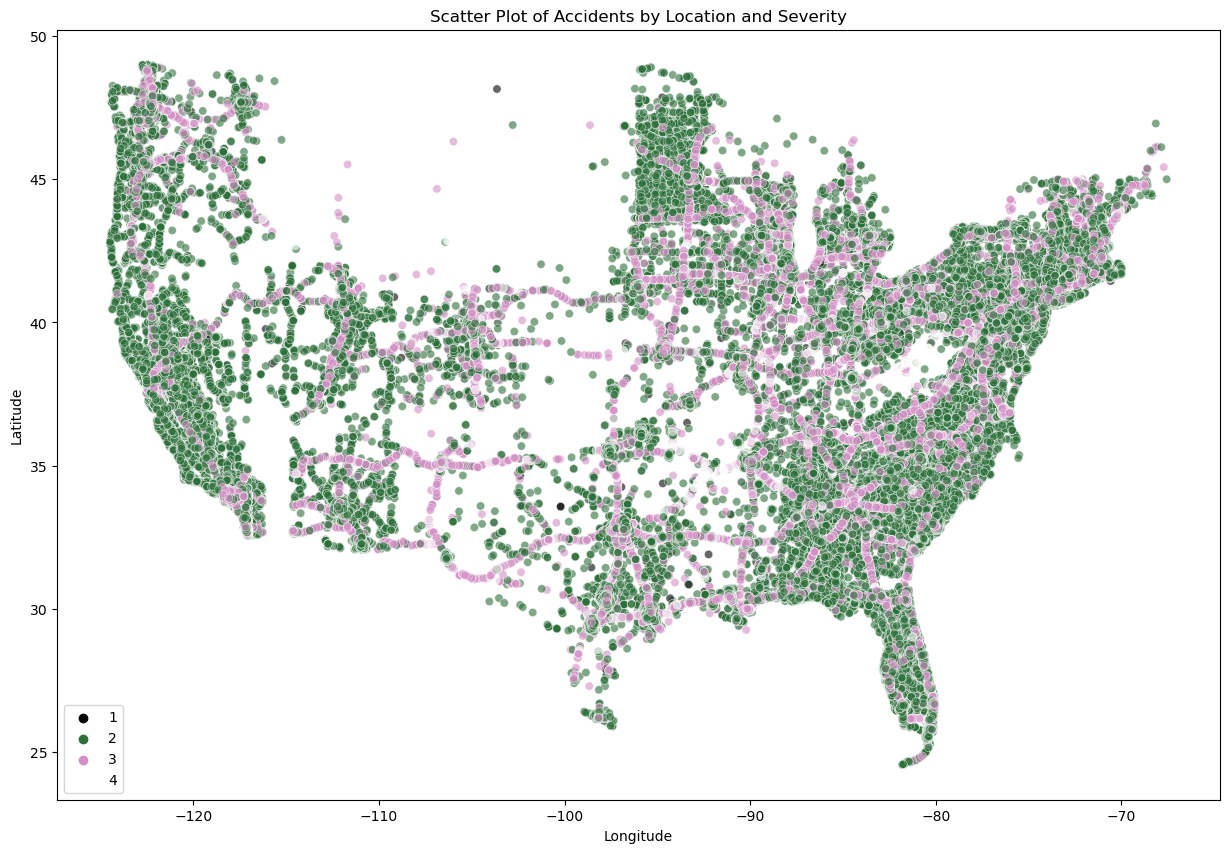

In [62]:
# Create a subset of the data
data_subset = data.head(20_50_000)

plt.figure(figsize=(15, 10))
sns.scatterplot(x=data_subset['Start_Lng'],
                y=data_subset['Start_Lat'],
                hue=data_subset['Severity'],
                palette="cubehelix", 
                alpha=0.6)  
#palette = "cubehelix","husl", "coolwarm", etc.
#s=100, edgecolor=None
plt.legend(loc="best")
plt.title('Scatter Plot of Accidents by Location and Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Conclusion:

1)City-wise Accident Distribution: Miami registers the highest number of accidents, likely due to its high population density and traffic volume. Star Junction and Stromsburg report the fewest accidents, possibly owing to their smaller size and lower traffic levels. State-wise Accident Distribution:

California has the highest number of accident cases, which correlates with its large population and extensive road network. South Dakota (SD) reports the fewest accidents, likely due to its lower population density and traffic volume.

2)Yearly Accident Rates: The year 2021 recorded the highest accident rates, suggesting a potential increase in traffic or changes in reporting practices during this period.

3)Accident Severity: Accident severity is categorized into four levels: 1, 2, 3, and 4. Most accidents fall under severity level 2, indicating that while numerous accidents occur, they are generally not extremely severe.

4)Weather Conditions During Accidents: Fair weather conditions prevail during most accidents, implying that factors other than adverse weather, such as driver behavior or traffic congestion, may significantly contribute to accident occurrences.

5)Time of Day for Accidents: Most accidents occur in the morning, likely due to rush hour traffic when more people are commuting to work or school. These insights provide valuable information on traffic patterns and accident hotspots, which can guide policy decisions, urban planning, and safety measures aimed at reducing the incidence and severity of accidents.